In [1]:
%matplotlib inline

import os
from os.path import splitext
from pathlib import Path
import json

# from tqdm import tqdm
from ipywidgets import interact

from PIL import Image, ImageDraw
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import transforms as T

In [2]:
IMG_DIR = Path('.') / 'data' / 'images'
EXP_DIR = Path('.') / 'data' / 'expedition'

RECON_CSV = EXP_DIR / '8296_label_babel.reconciled.csv'
UNREC_CSV = EXP_DIR / '8296_label_babel.unreconciled.csv'

BOX_HEADER = 'Rectangle around the primary label.: box'
SEL_HEADER = 'Rectangle around the primary label.: select'

SUB = 'subject_id'
BOX = 'box'
SEL = 'select'
RECON = 'reconciled'

LFT = 'left'
RGT = 'right'
TOP = 'top'
BOT = 'bottom'

In [3]:
images = next(os.walk(IMG_DIR))[2]

In [4]:
boxes = pd.read_csv(RECON_CSV)
boxes = boxes.rename(columns={
    BOX_HEADER: BOX,
    SEL_HEADER: SEL})
boxes = boxes.loc[:, [SUB, BOX, SEL]]
boxes = boxes.set_index(SUB)

In [5]:
def box_as_array(box):
    box = json.loads(box)
    return [
        box[LFT],  # x0
        box[TOP],  # y0
        box[RGT],  # x1
        box[BOT]]  # y1

In [6]:
boxes[BOX] = boxes[BOX].apply(box_as_array)

In [7]:
def draw_rectangle(ax, bbox, color):
    wide = abs(bbox[2] - bbox[0])
    high = abs(bbox[3] - bbox[1])
    rect = patches.Rectangle(
        bbox[:2],
        wide, high,
        fill=False,
        edgecolor=color,
        lw=2)
    patch = ax.add_patch(rect)

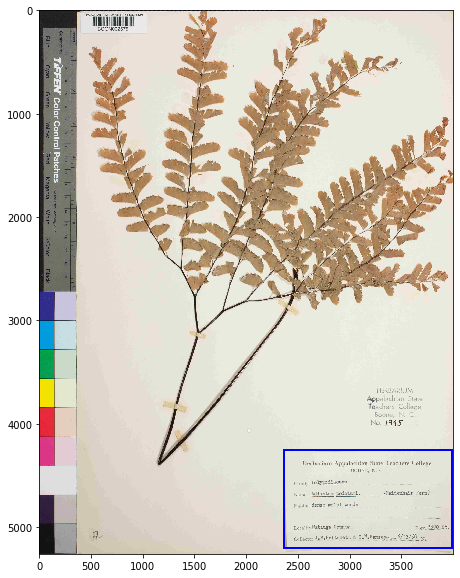

In [13]:
def show_image(idx):
    subject_id = int(splitext(images[idx])[0])

    fig, ax = plt.subplots(figsize=(10, 10))

    path = IMG_DIR / images[idx]
    image = Image.open(path)

    rec = boxes.loc[subject_id, :]
    box = rec.at[BOX]

    ax.imshow(image)

    draw_rectangle(ax, box, 'blue')

    plt.show()


# interact(show_image, idx=(0, len(images) - 1))
show_image(3042)

(4000, 5257)
[6, 61, 1639, 1007]


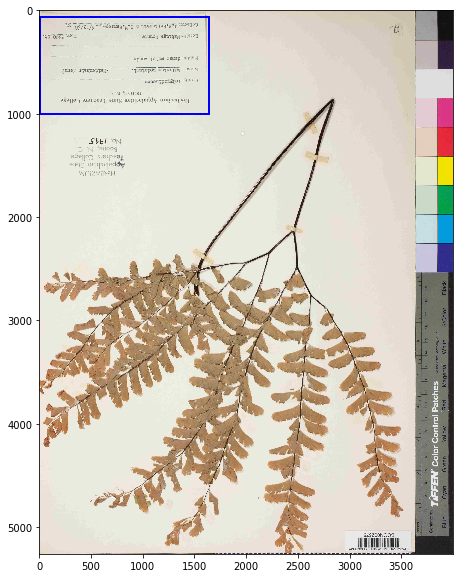

In [54]:
def transform_image(idx):
    fig, ax = plt.subplots(figsize=(10, 10))

    subject_id = int(splitext(images[idx])[0])

    path = IMG_DIR / images[idx]
    image = Image.open(path)

    rec = boxes.loc[subject_id, :]
    x0, y0, x1, y1 = rec.at[BOX]

    width, height = image.size

    # image = image.transpose(Image.FLIP_LEFT_RIGHT)
    # image = image.transpose(Image.FLIP_TOP_BOTTOM)
    # image = image.transpose(Image.ROTATE_90)
    image = image.transpose(Image.ROTATE_180)
    # image = image.transpose(Image.ROTATE_270)

    ax.imshow(image)

    # x0, y0, x1, y1 =  width - x1, y0, width - x0, y1  # FLIP_LEFT_RIGHT
    # x0, y0, x1, y1 = x0, height - y1, x1, height - y0  # FLIP_TOP_BOTTOM
    # x0, y0, x1, y1 = y0, width - x1, y1, width - x0  # ROTATE_90
    x0, y0, x1, y1 = width - x1, height - y1, width - x0, height - y0  # ROTATE_180
    # x0, y0, x1, y1 = height - y1, x0, height - y0, x1  # ROTATE_270

    draw_rectangle(ax, [x0, y0, x1, y1], 'blue')

    print(image.size)
    print([x0, y0, x1, y1])
    plt.show(image)


# interact(transform_image, idx=(0, len(images) - 1))
transform_image(3042)